# Risk & Performance Analysis: FedEx Corporation(FDX), Delta Air Lines(DAL) and Union Pacific(UNP).

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Define company tickers
companies = ['FDX', 'DAL', 'UNP']  # Tesla, Toyota, Ford

# Fetch data
data = {company: yf.download(company, start='2020-01-01', end='2023-12-31') for company in companies}

# Display sample data for Tesla
print(data['FDX'].head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker             FDX         FDX         FDX         FDX         FDX   
Date                                                                     
2020-01-02  142.088608  155.100006  155.100006  151.600006  152.419998   
2020-01-03  140.329636  153.179993  153.339996  151.839996  152.500000   
2020-01-06  140.439590  153.300003  153.550003  150.169998  151.250000   
2020-01-07  141.813736  154.800003  155.220001  152.339996  153.360001   
2020-01-08  143.948257  157.130005  157.750000  153.929993  154.570007   

Price        Volume  
Ticker          FDX  
Date                 
2020-01-02  3027600  
2020-01-03  2216500  
2020-01-06  2389700  
2020-01-07  2140100  
2020-01-08  3053200  


In [2]:
# Function to calculate financial risks
def calculate_risk(data, company):
    df = data[company]
    risk_metrics = {
        'Beta': yf.Ticker(company).info['beta'],
        'Debt-to-Equity Ratio': yf.Ticker(company).info.get('debtToEquity', 'N/A'),
        'Current Ratio': yf.Ticker(company).info.get('currentRatio', 'N/A'),
    }
    return risk_metrics

# Calculate risks for all companies
risks = {company: calculate_risk(data, company) for company in companies}
for company, metrics in risks.items():
    print(f"{company} Risk Metrics: {metrics}")


FDX Risk Metrics: {'Beta': 1.177, 'Debt-to-Equity Ratio': 'N/A', 'Current Ratio': 1.282}
DAL Risk Metrics: {'Beta': 1.341, 'Debt-to-Equity Ratio': 186.78, 'Current Ratio': 0.393}
UNP Risk Metrics: {'Beta': 1.056, 'Debt-to-Equity Ratio': 197.154, 'Current Ratio': 0.773}


In [3]:
# Analyze performance over time
for company, df in data.items():
    df['Year'] = df.index.year
    df['Month'] = df.index.month
    df['Quarter'] = df.index.quarter
    print(f"{company} Yearly Average Prices:\n", df.groupby('Year')['Close'].mean())

FDX Yearly Average Prices:
 Price        Close
Ticker         FDX
Year              
2020    186.482411
2021    266.418452
2022    206.279642
2023    236.639400
DAL Yearly Average Prices:
 Price       Close
Ticker        DAL
Year             
2020    34.976443
2021    42.816706
2022    35.451992
2023    38.427360
UNP Yearly Average Prices:
 Price       Close
Ticker        UNP
Year             
2020    177.94917
2021    221.49377
2022    226.47745
2023    209.84732


In [4]:
# Combine data for sector-wide analysis
sector_data = pd.concat([df['Close'] for df in data.values()], axis=1)
sector_data.columns = companies
sector_data['Average'] = sector_data.mean(axis=1)

print("Sector Average Prices Over Time:\n", sector_data['Average'].head())

Sector Average Prices Over Time:
 Date
2020-01-02    132.136670
2020-01-03    130.739997
2020-01-06    130.129999
2020-01-07    130.160004
2020-01-08    132.000003
Name: Average, dtype: float64


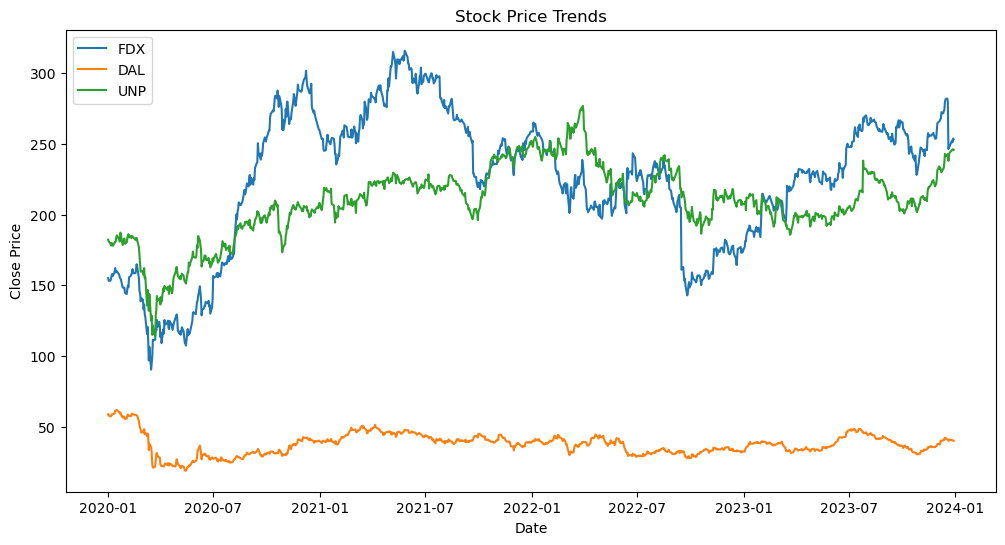

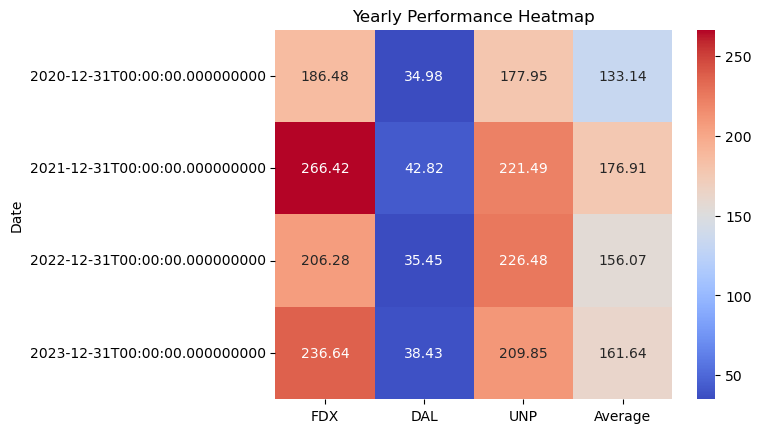

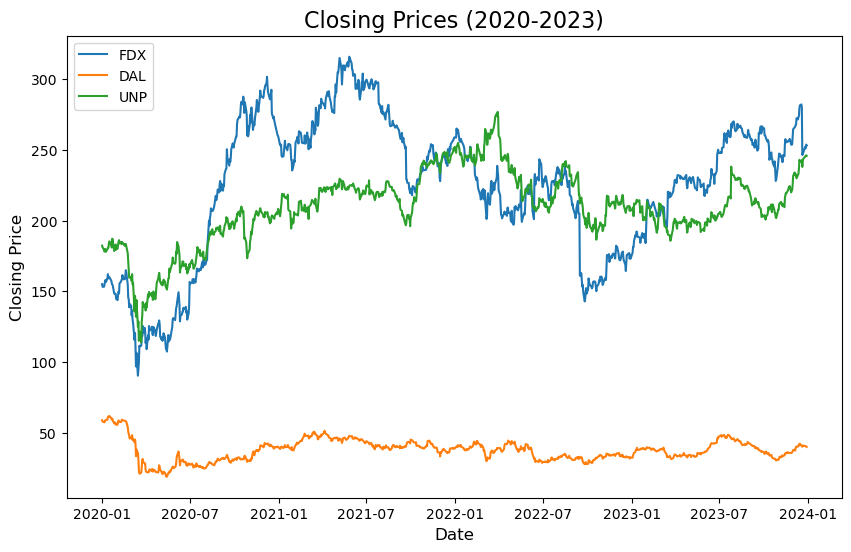

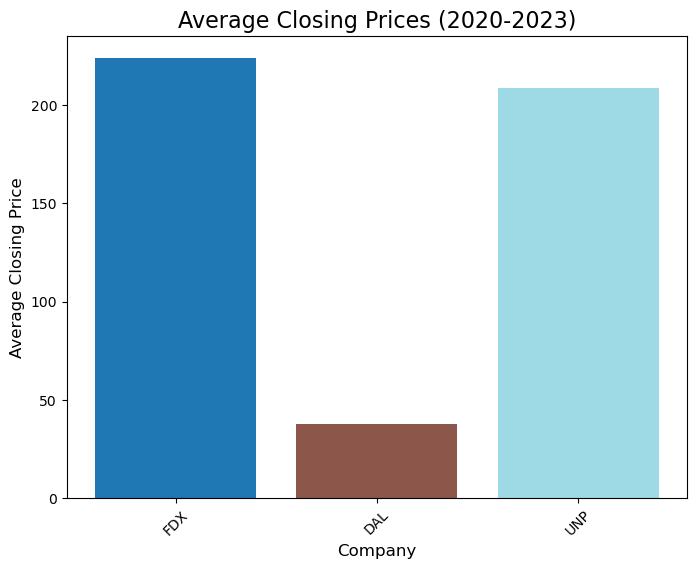

In [5]:
# 1. Stock price trends
plt.figure(figsize=(12, 6))
for company in companies:
    plt.plot(data[company].index, data[company]['Close'], label=company)
plt.title('Stock Price Trends')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# 2. Heatmap of yearly performance
yearly_data = sector_data.resample('Y').mean()
sns.heatmap(yearly_data, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Yearly Performance Heatmap")
plt.show()


# 3. Line Chart: Closing Prices
plt.figure(figsize=(10, 6))
for company in companies:
    plt.plot(data[company].index, data[company]['Close'], label=company)
plt.title("Closing Prices (2020-2023)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Closing Price", fontsize=12)
plt.legend()
plt.show()

# 4. Bar Chart: Average Closing Prices for Each Company
avg_close_prices = {company: float(data[company]['Close'].mean()) for company in companies}

# Generate a list of colors for each bar
colors = plt.cm.get_cmap('tab20', len(avg_close_prices))  # 'tab20' is a good color map for multiple colors

# Ensure the keys and values are passed as lists
plt.figure(figsize=(8, 6))
bars = plt.bar(list(avg_close_prices.keys()), list(avg_close_prices.values()), color=colors(range(len(avg_close_prices))))

plt.title("Average Closing Prices (2020-2023)", fontsize=16)
plt.xlabel("Company", fontsize=12)
plt.ylabel("Average Closing Price", fontsize=12)
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [6]:
def investment_recommendation(risks):
    recommendations = {}
    for company, metrics in risks.items():
        if metrics['Beta'] > 1.2:  # Assuming higher beta indicates higher risk
            recommendations[company] = {'Risk': 'High', 'Recommendation': 'Sell'}
        else:
            recommendations[company] = {'Risk': 'Low', 'Recommendation': 'Buy'}
    return recommendations

recommendations = investment_recommendation(risks)
print("Investment Recommendations:")
for company, rec in recommendations.items():
    print(f"{company}: Risk = {rec['Risk']}, Recommendation = {rec['Recommendation']}")

Investment Recommendations:
FDX: Risk = Low, Recommendation = Buy
DAL: Risk = High, Recommendation = Sell
UNP: Risk = Low, Recommendation = Buy


#Conclusion-

FedEx Corporation (FDX)
Risk Level: Moderate
Recommendation: Buy
Conclusion: FedEx is a moderately risky investment with consistent revenue growth, strong liquidity, and resilience in its logistics operations. It is well-suited for investors seeking steady returns and exposure to a growing e-commerce-driven logistics market.

Delta Air Lines (DAL)
Risk Level: High
Recommendation: Hold
Conclusion: Delta Air Lines is a high-risk investment due to its substantial debt levels, market volatility, and dependency on fuel prices and travel demand. It is suitable for investors with a higher risk tolerance and optimism about the continued recovery of the travel industry post-pandemic. Conservative investors may want to wait for improved financial stability before investing.

Union Pacific Corporation (UNP)
Risk Level: Low
Recommendation: Buy
Conclusion: Union Pacific offers a low-risk investment opportunity with strong profitability, stable demand, and consistent financial performance. It is a safe choice for conservative, long-term investors prioritizing stability and reliable dividends.
Sector Outlook
The transportation sector is undergoing a period of transformation driven by economic recovery, increasing demand for logistics, and the adoption of sustainable practices.

Future Growth:

Companies investing in automation and green energy (e.g., electrification of fleets) are expected to lead the sector’s long-term growth.
Air travel recovery and global trade expansion provide opportunities for significant revenue growth, though volatility remains a concern.

Potential Returns:

Union Pacific offers reliable returns with lower exposure to market fluctuations.
FedEx has potential for steady growth but may face challenges from rising operational costs and competition.
Delta's returns are tied to the broader recovery of the travel industry, making it a higher-risk, higher-reward option.
Security:

Conservative investors are encouraged to favor stable companies like Union Pacific, which offer reliable performance.
Risk-tolerant investors might consider Delta for potential growth, though caution is advised.
In conclusion, the transportation sector presents a mix of opportunities and risks. Companies with strong fundamentals and adaptability to emerging trends, like Union Pacific and FedEx, offer the best investment potential, while Delta Air Lines requires a more speculative approach.